In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram with OpenCV
# The first argument is a list of images; we only have one (img)
# The second argument is the list of channels, here [0] since it's a single-channel (grayscale) image
# The third argument (None) would be a mask if you only wanted a certain region of the image
# The fourth argument ([256]) is the number of bins(hist size)
# The fifth argument ([0, 256]) is the range of pixel intensity values
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
#hist, bins = np.histogram(img, 256, [0, 256])
#print(hist)

# Plot the histogram using matplotlib
plt.fill(hist)
#plt.plot(hist)
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


In [1]:
"""
Created on Tue Sep 10 22:18:29 2019

@author: CV
"""

#access an image pixel

import cv2
import numpy
import matplotlib.pyplot as plt

gray_img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)
print(type(gray_img[0,0]))
height, width = gray_img.shape
cv2.imshow('original', gray_img)

#img2[:,:]=img2[:,:]/2
for y in range(0,height):
    for x in range(0,width):
        gray_img[y,x]=gray_img[y,x]/2

cv2.imshow('reduced', gray_img)
cv2.waitKey()
cv2.destroyAllWindows()

<class 'numpy.uint8'>


<class 'numpy.uint8'>


True

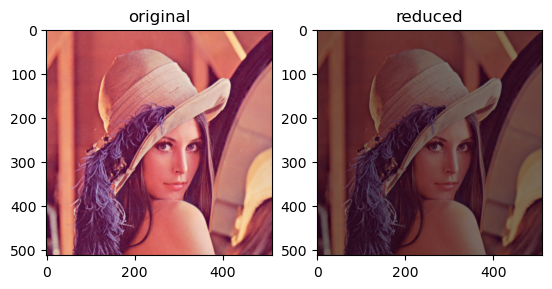

In [2]:
# %load opencv_show_image.py
"""
Created on Tue Sep 10 22:18:29 2019

@author: CV
"""

#access a color image pixel

import cv2
import numpy
import matplotlib.pyplot as plt

img = cv2.imread('lena.png')
print(type(img[0,0,0])) # The pixel type
height, width, channel = img.shape

#re-order color channels ->> WHY? Ans: In OpenCV the channels are stored as bgr; however, in pyplot, the channels are ordered as rgb
#img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
b,g,r = cv2.split(img) # returns the intensity values of the colors
img2 = cv2.merge([r,g,b]) # merge the channels to configure an image

plt.subplot(1,2,1) # subplot() lets multiple images displayed in a single plot; the arguments are (rows, columns, index)
plt.title('original')
plt.imshow(img2)

#img2[:,:,:]=img2[:,:,:]/2
for y in range(0,height):
    for x in range(0,width):
        img2[y,x,:]=img2[y,x,:]/2 # ':' selects all the channels of the pixel; to select blue, green, red channel, use indices 0, 1, 2 respectively
        # img2[y,x,0]=img2[y,x,0]/2
        # img2[y,x,1]=img2[y,x,1]/2
        # img2[y,x,2]=img2[y,x,2]/2
        
plt.subplot(1,2,2)
plt.title('reduced')
plt.imshow(img2)

#need to re-order color channels again!
cv2.imwrite('test.png', img2)

###### %%writefile test
## Practice
1. Read an image from file
2. Show the original image using matplotlib.pyplot!
3. For each pixel, compute its <i>distance</i> from image center
4. For each pixel, set <i>weight</i> = (360. - <i>distance</i>) / 360.
5. For each pixel, multiply its brightness by the <i>weight</i> to produce vignetting effect
4. Show the vignetting image using matplotlib.pyplot
5. Write the image to file
6. Upload your image file
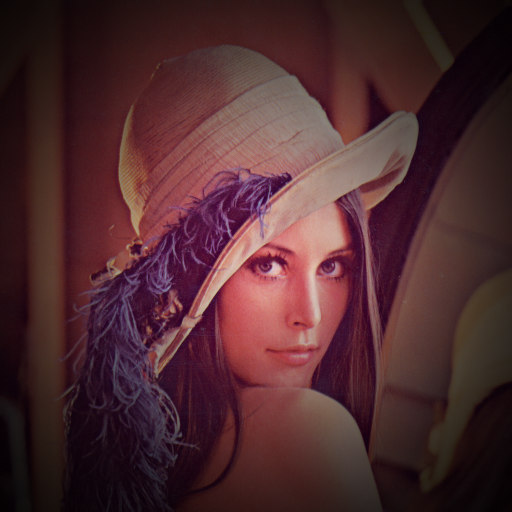

True

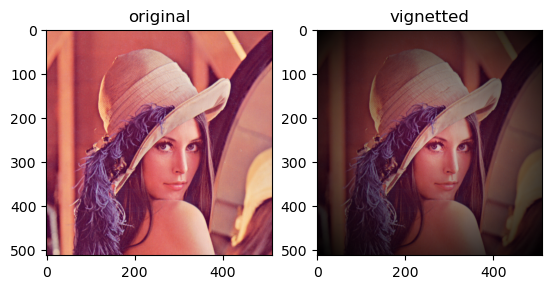

In [26]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

#1. Read an image from file
img = cv2.imread('lena.png')
height, width, channel = img.shape
#2. Show the original image using matplotlib.pyplot!
#re-order color channels ->> WHY? Ans: In OpenCV the channels are stored as bgr; however, in pyplot, the channels are ordered as rgb
b, g, r = cv2.split(img)
reordered_img = cv2.merge([r, g, b])
# cv2.imshow('reordered_img', reordered_img) ->> error
plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(reordered_img)
#3. For each pixel, compute its distance from image center
dist = np.zeros((height, width), dtype = float)
center = (height / 2, width / 2)
for y in range(0, height):
    for x in range(0, width):
        dist[y, x] = math.sqrt( pow( y - center[0], 2 ) + pow( x - center[1], 2 ) )
# 4. For each pixel, set weight = (360. - distance) / 360.
weight = np.zeros((height, width), dtype = float)
for y in range(0, height):
    for x in range(0, width):
        weight[y, x] = ( (360 - dist[y, x]) / 360 )
#5. For each pixel, multiply its brightness by the weight to produce vignetting effect
for y in range(0, height):
    for x in range(0, width):
        reordered_img[y, x, :] = reordered_img[y, x, :] * weight[y, x]
#6. Show the vignetting image using matplotlib.pyplot
plt.subplot(1, 2, 2)
plt.title('vignetted')
plt.imshow(reordered_img)
#7. Write the image to file
# reordering the color channels
r, g, b = cv2.split(reordered_img)
output_img = cv2.merge([b, g, r])
cv2.imwrite('lena_vigneteed.png', output_img)